In [12]:
# author: 黄金旺铺
# date: 2018-11-30
import cv2
import numpy as np

src = cv2.imread('assets/test_hist.png')
if src is None:
    print('Could not open or find the image:', 'test_hist.png')
    exit(0)

# 分离3通道
bgr_planes = cv2.split(src)

# bin的数量
histSize = 32
histRange = (0, 256)  # the upper boundary is exclusive
accumulate = False

# 计算各通道的直方图信息
b_hist = cv2.calcHist(bgr_planes, [0], None, [
                    histSize], histRange, accumulate=accumulate)
g_hist = cv2.calcHist(bgr_planes, [1], None, [
                    histSize], histRange, accumulate=accumulate)
r_hist = cv2.calcHist(bgr_planes, [2], None, [
                    histSize], histRange, accumulate=accumulate)

# 显示直方图图像的宽高
hist_w, hist_h = 512, 400
# bin 显示实际宽度
bin_w = int(round(hist_w/histSize))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

# 数据归一化，方便显示，最小最大归一化，最小为0，最大为显示图像的高度
cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)

# 画线的方式显示信息，每个线的颜色为统计颜色
for i in range(1, histSize):
    cv2.line(histImage, (bin_w*(i-1), hist_h - int(b_hist[i-1])),
            (bin_w*(i), hist_h - int(b_hist[i])),
            (255, 0, 0), thickness=2)
    cv2.line(histImage, (bin_w*(i-1), hist_h - int(g_hist[i-1])),
            (bin_w*(i), hist_h - int(g_hist[i])),
            (0, 255, 0), thickness=2)
    cv2.line(histImage, (bin_w*(i-1), hist_h - int(r_hist[i-1])),
            (bin_w*(i), hist_h - int(r_hist[i])),
            (0, 0, 255), thickness=2)

cv2.imshow('Source image', src)
cv2.imshow('calcHist Demo', histImage)
cv2.waitKey(0)
cv2.destroyAllWindows()


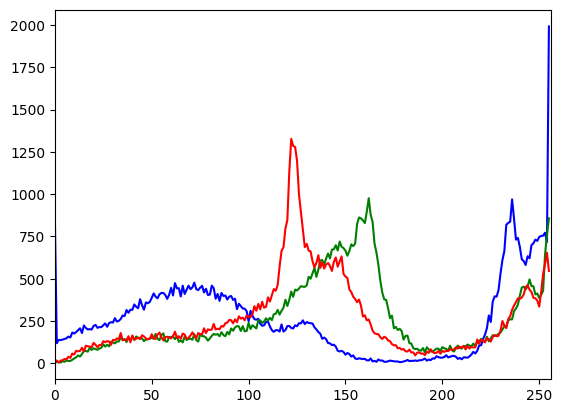

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# img = cv2.imread('assets/test_hist.png', 0)
# plt.hist(img.ravel(),256,[0,256]); 
# plt.show()

img = cv2.imread('assets/test_hist.png')
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()